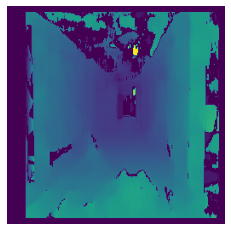

In [3]:

import numpy as np 
import cv2
import matplotlib.pyplot as plt

imgL = cv2.imread('corridorl.jpg',0) 
imgR = cv2.imread('corridorr.jpg',0)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15) 
disparity = stereo.compute(imgL,imgR)
disp = cv2.normalize(src=disparity, dst=disparity, beta=0, alpha=255,
                             norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

disparity
plt.imshow(disp)
plt.axis('off')
plt.show()
#cv2.imshow('disp',disp)


In [34]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

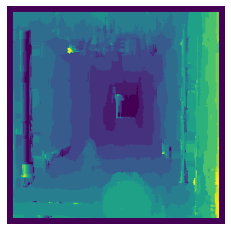

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

maxDisparity=15 
window_size=7

limg = cv2.imread('corridorl.jpg',0) 
rimg= cv2.imread('corridorr.jpg',0)
img_size=np.shape(limg)[0:2]

imgDiff=np.zeros((img_size[0],img_size[1],maxDisparity))
e = np.zeros(img_size)
for i in range(0,maxDisparity):
    e=np.square(rimg[:,0:(img_size[1]-i)]- limg[:,i:img_size[1]])
    e2=np.zeros(img_size) 
    for x in range((window_size),(img_size[0]-window_size)):
        for y in range((window_size),(img_size[1]-window_size)):
            e2[x,y]=np.sum(e[(x-window_size):(x+window_size),(y-window_size):(y+window_size)])
        
        imgDiff[:,:,i]=e2

dispMap=np.zeros(img_size)

for x in range(0,img_size[0]):
    for y in range(0,img_size[1]):
        val=np.sort(imgDiff[x,y,:])
        val_id=np.argsort(imgDiff[x,y,:])
        dispMap[x,y]=val_id[0]/maxDisparity*255

plt.imshow(dispMap)
plt.axis('off')
plt.show()

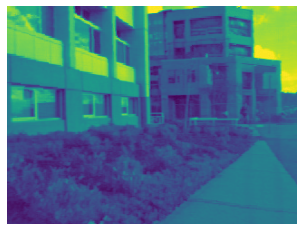

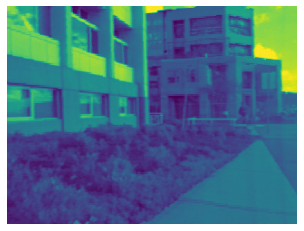

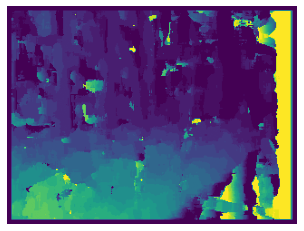

In [71]:
maxDisparity=25 
window_size=5

limg = cv2.imread('triclopsi2l.jpg',0) 
rimg= cv2.imread('triclopsi2r.jpg',0)
img_size=np.shape(limg)[0:2]
plt.imshow(limg)
plt.axis('off')
plt.show()
plt.imshow(rimg)
plt.axis('off')
plt.show()

imgDiff=np.zeros((img_size[0],img_size[1],maxDisparity))
e = np.zeros(img_size)
for i in range(0,maxDisparity):
    e=np.square(rimg[:,0:(img_size[1]-i)]- limg[:,i:img_size[1]])

    e2=np.zeros(img_size) 
    for x in range((window_size),(img_size[0]-window_size)):
        for y in range((window_size),(img_size[1]-window_size)):
            e2[x,y]=np.sum(e[(x-window_size):(x+window_size),(y-window_size):(y+window_size)])
        
        imgDiff[:,:,i]=e2

dispMap=np.zeros(img_size)

for x in range(0,img_size[0]):
    for y in range(0,img_size[1]):
        val=np.sort(imgDiff[x,y,:])
        
        val_id=np.argsort(imgDiff[x,y,:])
        dispMap[x,y]=val_id[0]/maxDisparity*255

plt.imshow(dispMap)
plt.axis('off')
plt.show()

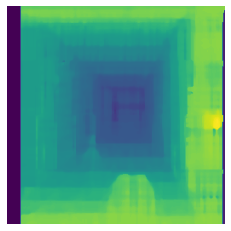

In [32]:
imgL = cv2.imread('corridorl.jpg',0) 
imgR = cv2.imread('corridorr.jpg',0)
num = 1
blockSize = 5
stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=0,  # 最小视差值(int类型)，通常情况下为0。此参数决定左图中的像素点在右图匹配搜索的起点。最小视差值越小，视差图右侧的黑色区域越大
    numDisparities=16 * num,  # 视差搜索范围，其值必须为16的整数倍且大于0。视差窗口越大，视差图左侧的黑色区域越大
    blockSize=blockSize,  # 匹配块大小（SADWindowSize(SAD代价计算的窗口大小)）,大于1的奇数。默认为5,一般在3~11之间
    P1=8 * 3 * blockSize * blockSize, # P1是相邻像素点视差增/减 1 时的惩罚系数；需要指出，在动态规划时，P1和P2都是常数。一般：P1=8*通道数*blockSize*blockSize，P2=4*P1
    P2=32 * 3 * blockSize * blockSize,  # P2是相邻像素点视差变化值大于1时的惩罚系数。P2必须大于P1。p2值越大，差异越平滑
    disp12MaxDiff=20,  # 左右视差图的最大容许差异（左右一致性检测,超过将被清零），默认为-1，即不执行左右视差检查。
    preFilterCap=15,  # 图像预处理参数，水平sobel预处理后，映射滤波器大小。默认为15
    uniquenessRatio=0,  # 视差唯一性检测百分比，视差窗口范围内最低代价是次低代价的(1+uniquenessRatio/100)倍时，最低代价对应的视差值才是该像素点的视差，否则该像素点的视差为 0，通常为5~15.
    speckleWindowSize=100, # 视差连通区域像素点个数的大小。若大于，视差值认为有效，否则认为当前视差值是噪点。将其设置为0可禁用斑点过滤。否则，将其设置在50-200的范围内。
    speckleRange=2,  # 视差变化阈值，每个连接组件内的最大视差变化。如果你做斑点过滤，将参数设置为正值，它将被隐式乘以16.通常，1或2就足够好了
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY  # 模式,取值0,1,2,3。默认被设置为false。
)
 
# stereo_sgbm_right_matcher = cv2.ximgproc.createRightMatcher(stereo_sgbm)
# 计算视差: 根据SGBM方法生成差异图
disparity_left = stereo_sgbm.compute(imgL, imgR)
disp_left = cv2.normalize(src=disparity_left, dst=disparity_left, beta=0, alpha=255,
                             norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(disp_left)
plt.axis('off')
plt.show()

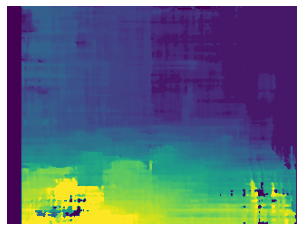

In [67]:
imgL = cv2.imread('triclopsi2l.jpg',0) 
imgR = cv2.imread('triclopsi2r.jpg',0)
num = 1
blockSize = 1
stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=0,  
    numDisparities=16 * num,  
    blockSize=blockSize,  
    P1=8 * 3 * blockSize * blockSize, 
    P2=32 * 3 * blockSize * blockSize,  
    disp12MaxDiff=50,  
    preFilterCap=15,  
    uniquenessRatio=0,  
    speckleWindowSize=50,
    speckleRange=2,  
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY  
)
 

disparity_left = stereo_sgbm.compute(imgL, imgR)
disp_left = cv2.normalize(src=disparity_left, dst=disparity_left, beta=0, alpha=255,
                             norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(disp_left)
plt.axis('off')
plt.show()